In [34]:
import numpy as np
import sympy as syp
import scipy as sp
import helper_functions as hf
import ipywidgets as widgets
from jupyter_ui_poll import ui_events
import time
from functools import reduce
import matplotlib.pyplot as plt


NUMBER_OF_RANDOM_VALUES = 1000 # Количество случайных значений для генерации случайной величины
DENSITY = 1000 # Плотность сетки графиков

x, y, f = syp.symbols('x y f')

### Непрерывная случайная величина

In [35]:
density_function = 2 * (x * x + y / 3) # Заданная плотность распределения

density_function_x = syp.integrate(density_function, (y, 0, 1)) # Плотность распределения величины X
density_function_y = syp.integrate(density_function, (x, 0, 1)) # Плотность распределения величины Y

conditional_density_function_x = density_function / density_function_y # Условная плотность распределения величины X при условии Y
conditional_density_function_y  = density_function / density_function_x # Условная плотность распределения величины Y при условии X

print("Заданная плотность распределения:")
display(density_function)

print("Плотность распределения величины X:")
display(density_function_x)

print("Плотность распределения величины Y:")
display(density_function_y)

print("Условная плотность распределения величины X при условии Y:")
display(conditional_density_function_x)

print("Условная плотность распределения величины Y при условии X:")
display(conditional_density_function_y)

Заданная плотность распределения:


2*x**2 + 2*y/3

Плотность распределения величины X:


2*x**2 + 1/3

Плотность распределения величины Y:


2*y/3 + 2/3

Условная плотность распределения величины X при условии Y:


(2*x**2 + 2*y/3)/(2*y/3 + 2/3)

Условная плотность распределения величины Y при условии X:


(2*x**2 + 2*y/3)/(2*x**2 + 1/3)

In [36]:
rng = np.random.default_rng() # Генератор псевдослучайных чисел

In [37]:
distribution_function_x = syp.integrate(density_function_x, (x, 0, x)) # Функция распределения величины X
distribution_function_y = syp.integrate(density_function_y, (y, 0, y)) # Функция распределения величины Y
conditional_distribution_function_x = syp.integrate(conditional_density_function_x, (x, 0, x)) # Условная функция распределения величины X при условии Y
conditional_distribution_function_y = syp.integrate(conditional_density_function_y, (y, 0, y)) # Условная функция распределения величины Y при условии X

print("Функция распределения величины X:")
display(distribution_function_x)

print("Функция распределения величины Y:")
display(distribution_function_y)

print("Условная функция распределения величины X при условии Y:")
display(conditional_distribution_function_x)

print("Условная функция распределения величины Y при условии X:")
display(conditional_distribution_function_y)


Функция распределения величины X:


2*x**3/3 + x/3

Функция распределения величины Y:


y**2/3 + 2*y/3

Условная функция распределения величины X при условии Y:


x**3/(y + 1) + x*y/(y + 1)

Условная функция распределения величины Y при условии X:


6*x**2*y/(6*x**2 + 1) + y**2/(6*x**2 + 1)

In [38]:

inverse_distribution_function_x = syp.solve(distribution_function_x - f, x) # Обратная функция распределения величины X
inverse_distribution_function_y = syp.solve(distribution_function_y - f, y) # Обратная функция распределения величины Y

inverse_conditional_distribution_function_x = syp.solve(conditional_distribution_function_x - f, x) # Обратная условная функция распределения величины X при условии Y
inverse_conditional_distribution_function_y = syp.solve(conditional_distribution_function_y - f, y) # Обратная условная функция распределения величины Y при условии X

inverse_distribution_functions = [inverse_distribution_function_x, inverse_distribution_function_y] # Массив обратных функций распределения
inverse_conditional_distribution_functions = [inverse_conditional_distribution_function_x, inverse_conditional_distribution_function_y] # Массив обратных условных функций распределения
function_symbols = [x, y] # Массив переменных для соответствующих функций

print("Обратная функция распределения величины X:")
display(*inverse_distribution_function_x)

print("Обратная функция распределения величины Y:")
display(*inverse_distribution_function_y)

print("Обратная условная функция распределения величины X при условии Y:")
display(*inverse_conditional_distribution_function_x)

print("Обратная условная функция распределения величины Y при условии X:")
display(*inverse_conditional_distribution_function_y)

Обратная функция распределения величины X:


-(-1/2 - sqrt(3)*I/2)*(-81*f/4 + sqrt(6561*f**2/4 + 27/2)/2)**(1/3)/3 + 1/(2*(-1/2 - sqrt(3)*I/2)*(-81*f/4 + sqrt(6561*f**2/4 + 27/2)/2)**(1/3))

-(-1/2 + sqrt(3)*I/2)*(-81*f/4 + sqrt(6561*f**2/4 + 27/2)/2)**(1/3)/3 + 1/(2*(-1/2 + sqrt(3)*I/2)*(-81*f/4 + sqrt(6561*f**2/4 + 27/2)/2)**(1/3))

-(-81*f/4 + sqrt(6561*f**2/4 + 27/2)/2)**(1/3)/3 + 1/(2*(-81*f/4 + sqrt(6561*f**2/4 + 27/2)/2)**(1/3))

Обратная функция распределения величины Y:


-sqrt(3*f + 1) - 1

sqrt(3*f + 1) - 1

Обратная условная функция распределения величины X при условии Y:


y/(-27*f*y/2 - 27*f/2 + sqrt(108*y**3 + (-27*f*y - 27*f)**2)/2)**(1/3) - (-27*f*y/2 - 27*f/2 + sqrt(108*y**3 + (-27*f*y - 27*f)**2)/2)**(1/3)/3

y/((-1/2 - sqrt(3)*I/2)*(-27*f*y/2 - 27*f/2 + sqrt(108*y**3 + (-27*f*y - 27*f)**2)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*f*y/2 - 27*f/2 + sqrt(108*y**3 + (-27*f*y - 27*f)**2)/2)**(1/3)/3

y/((-1/2 + sqrt(3)*I/2)*(-27*f*y/2 - 27*f/2 + sqrt(108*y**3 + (-27*f*y - 27*f)**2)/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-27*f*y/2 - 27*f/2 + sqrt(108*y**3 + (-27*f*y - 27*f)**2)/2)**(1/3)/3

Обратная условная функция распределения величины Y при условии X:


-3*x**2 - sqrt(6*f*x**2 + f + 9*x**4)

-3*x**2 + sqrt(6*f*x**2 + f + 9*x**4)

In [39]:
selected_distribution_function_index = inverse_distribution_functions.index(hf.selector("Выберите обратную функцию", inverse_distribution_functions)) # Индекс выбранной обратной функции распределения для генерации
selected_inverse_distribution_function = inverse_distribution_functions[selected_distribution_function_index] # Выбранная обратная функция распределения


# Функция для генерации значения выбранной случайной величины
def random_variable_generator():
    for fu in selected_inverse_distribution_function:
        v = fu.subs(f, rng.random())
        if v.is_real and 0 <= v <= 1:
            return v


random_variable_values_first = [random_variable_generator() for _ in range(NUMBER_OF_RANDOM_VALUES)] # Генерация значений выбранной случайной величины

Label(value='Выберите обратную функцию')

Dropdown(options=([-(-1/2 - sqrt(3)*I/2)*(-81*f/4 + sqrt(6561*f**2/4 + 27/2)/2)**(1/3)/3 + 1/(2*(-1/2 - sqrt(3…

Button(description='Ok', style=ButtonStyle())

In [40]:
inverse_conditional_distribution_function_index = 1 - selected_distribution_function_index # Индекс обратной условной функции распределения для невыбранной случайной величины
inverse_conditional_distribution_function = inverse_conditional_distribution_functions[inverse_conditional_distribution_function_index] # Условная функция распределения для невыбранной случайной величины

symbol_index = selected_distribution_function_index # Индекс символа для подстановки в условную функцию распределения
symbol = function_symbols[symbol_index] # Символ для подстановки в условную функцию распределения


# Функция для генерации значения двумерной случайной величины
def two_dimensional_random_variable_generator(random_variable):
    for fu in inverse_conditional_distribution_function:
        inverse_conditional_distribution_function_substituted = fu.subs(symbol, random_variable) # Условная функция распределения невыбранной случайной величины при условии ith_random_variable_value_first
        second_random_variable = inverse_conditional_distribution_function_substituted.subs(f, rng.random()) # Генерация значения невыбранной случайной величины при условии ith_random_variable_value_first
        if second_random_variable.is_real and 0 <= second_random_variable <= 1:
            return [random_variable, second_random_variable]


random_variable_values = list(map(two_dimensional_random_variable_generator, random_variable_values_first)) # Массив значений двумерной случайной величины

In [41]:
mean_x = syp.integrate(syp.integrate(density_function * x, (y, 0, 1)), (x, 0, 1)) # Теоретическое математическое ожидание случайной величины X
mean_y = syp.integrate(syp.integrate(density_function * y, (x, 0, 1)), (y, 0, 1)) # Теоретическое математическое ожидание случайной величины Y
mean = [mean_x, mean_y]

variance_x = syp.integrate(syp.integrate(density_function * (x - mean_x) ** 2, (y, 0, 1)), (x, 0, 1)) # Теоретическая дисперсия случайной величины X
variance_y = syp.integrate(syp.integrate(density_function * (y - mean_y) ** 2, (x, 0, 1)), (y, 0, 1)) # Теоретическая дисперсия случайной величины Y
variance = [variance_x, variance_y]

covariance = syp.integrate(syp.integrate(density_function * (x - mean_x) * (y - mean_y), (x, 0, 1)), (y, 0, 1)) # Теоретическая ковариация случайных величин X и Y
correlational_coefficient = covariance / (variance_x * variance_y) ** 0.5 # Теоретический коэффициент корреляции случайных величин X и Y

print("Теоретическое математическое ожидание: ", mean)
print("Теоретическая дисперсия: ", variance)
print("Теоретическая ковариация: ", covariance)
print("Теоретический коэффициент корреляции случайных величин X и Y: ", correlational_coefficient)

Теоретическое математическое ожидание:  [2/3, 5/9]
Теоретическая дисперсия:  [1/15, 13/162]
Теоретическая ковариация:  -1/108
Теоретический коэффициент корреляции случайных величин X и Y:  -0.126592420885458


In [42]:
# Эмпирические параметры
def emperic_parameters(two_dimensional_random_variable):
    # Вычисление эмпирического математического ожидания
    e_mean = reduce(lambda prev, cur: [prev[0] + cur[0], prev[1] + cur[1]], random_variable_values)
    e_mean[0] /= len(random_variable_values)
    e_mean[1] /= len(random_variable_values)

    # Вычисление эмпирической дисперсии
    e_variance = reduce(lambda prev, cur: [prev[0] + (cur[0] - e_mean[0]) ** 2, prev[1] + (cur[1] - e_mean[1]) ** 2], random_variable_values)
    e_variance[0] /= len(random_variable_values)
    e_variance[1] /= len(random_variable_values)

    # Вычисление эмперической ковариации
    e_covariance = reduce(lambda prev, cur: prev + (cur[0] - e_mean[0]) * (cur[1] - e_mean[1]), random_variable_values, 0)
    e_covariance /= len(random_variable_values)

    # Вычисление эмперического коэффициента корреляции
    e_correlational_coefficient = e_covariance / (e_variance[0] * e_variance[1]) ** 0.5
    
    return e_mean, e_variance, e_covariance, e_correlational_coefficient


e_mean, e_variance, e_covariance, e_correlational_coefficient = emperic_parameters(random_variable_values)

In [43]:
print("Эмпирическое математическое ожидание: ", e_mean)
print("Эмпирическая дисперсия: ", e_variance)
print("Эмперическая ковариация: ", e_covariance)
print("Эмперический коэффициент корреляции случайных величин X и Y: ", e_correlational_coefficient)

Эмпирическое математическое ожидание:  [0.660784230163377, 0.560970038951383]
Эмпирическая дисперсия:  [0.0695826759754753, 0.0773217868410552]
Эмперическая ковариация:  -0.00959870766798848
Эмперический коэффициент корреляции случайных величин X и Y:  -0.130861309283704


In [44]:
# Интервальная оценка коэффициента корреляции
def interval_correlational_coefficient(two_dimensional_random_variable, confidence):
    z = np.emath.arctanh(float(e_correlational_coefficient))
    t = sp.special.erfinv(confidence)

    interval_from = np.tanh(z - t / (len(random_variable_values) - 3) ** 0.5)
    interval_to = np.tanh(z + t / (len(random_variable_values) - 3) ** 0.5)

    return interval_from, interval_to

In [45]:
confidence = hf.float_input("Доверительная вероятность %", 0, 100, 1, False, False)[0] / 100

interval_from, interval_to = interval_correlational_coefficient(random_variable_values, confidence)

print(f"Доверительный интервал для коэффициента корреляции: [{interval_from}, {interval_to}]")

Label(value='Доверительная вероятность %')

FloatText(value=0.0)

Button(description='Ok', style=ButtonStyle())

Доверительный интервал для коэффициента корреляции: [-0.166875966073541, -0.09449792482571066]


In [46]:
# Распределения значений по интервалам
def distribute_by_intervals(two_dimensional_random_variable, number_of_blocks_x, number_of_blocks_y):
    x_max = reduce(lambda acc, cur: acc if acc[0] > cur[0] else cur, random_variable_values)[0]
    x_min = reduce(lambda acc, cur: acc if acc[0] < cur[0] else cur, random_variable_values)[0]
    y_max = reduce(lambda acc, cur: acc if acc[1] > cur[1] else cur, random_variable_values)[1]
    y_min = reduce(lambda acc, cur: acc if acc[1] < cur[1] else cur, random_variable_values)[1]

    x_step = (x_max - x_min) / number_of_blocks_x
    y_step = (y_max - y_min) / number_of_blocks_y

    block_values = [[0 for _ in range(number_of_blocks_y + 1)] for _ in range(number_of_blocks_x + 1)]

    # Распределение значений по интервалам
    for value in random_variable_values:
        i_index = int((value[0] - x_min) // x_step)
        j_index = int((value[1] - y_min) // y_step)

        if i_index < number_of_blocks_x and j_index < number_of_blocks_y:
            block_values[i_index][j_index] += 1
            block_values[i_index][-1] += 1
            block_values[-1][j_index] += 1
            block_values[-1][-1] += 1

    return block_values, x_min, x_max, y_min, y_max, x_step, y_step

In [47]:
# Гистограмма для первой величины
def draw_hist_x(x_min, x_max, x_step, block_values):
    number_of_blocks_x = len(block_values) - 1
    columns = [x_min + value * x_step + x_step / 2 for value in range(number_of_blocks_x)] # Середина каждого интервала
    heights = [block_values[i][-1] / block_values[-1][-1] / x_step for i in range(number_of_blocks_x)] # Высота каждого столбца
    plt.bar(columns, heights, x_step)

Label(value='Количество интервалов первой величины')

IntText(value=0)

Button(description='Ok', style=ButtonStyle())

Label(value='Количество интервалов второй величины')

IntText(value=0)

Button(description='Ok', style=ButtonStyle())

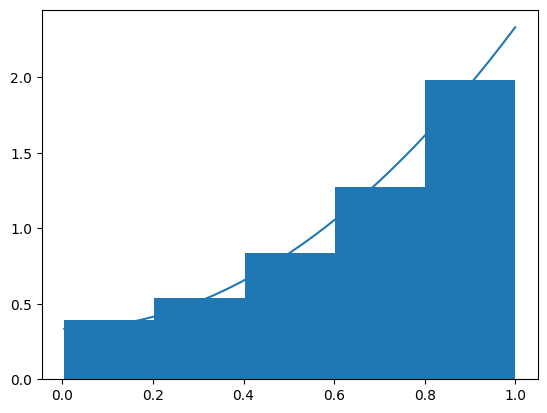

In [48]:
number_of_blocks_x = hf.int_input("Количество интервалов первой величины", 1, NUMBER_OF_RANDOM_VALUES, 1)[0]
number_of_blocks_y = hf.int_input("Количество интервалов второй величины", 1, NUMBER_OF_RANDOM_VALUES, 1)[0]
block_values, x_min, x_max, y_min, y_max, x_step, y_step = distribute_by_intervals(random_variable_values, number_of_blocks_x, number_of_blocks_y)
draw_hist_x(x_min, x_max, x_step, block_values)

# Плотность вероятности для первой величины
xs = np.linspace(x_min, x_max, DENSITY)
zs = [density_function_x.subs(x, x_value) for x_value in xs]
plt.plot(xs, zs)

None

In [49]:
# Гистограмма для второй величины
def draw_hist_y(y_min, y_max, y_step, block_values):
    number_of_blocks_y = len(block_values[0]) - 1
    columns = [y_min + value * y_step + y_step / 2 for value in range(number_of_blocks_y)] # Середина каждого интервала
    heights = [block_values[-1][j] / block_values[-1][-1] / y_step for j in range(number_of_blocks_y)] # Высота каждого столбца
    plt.bar(columns, heights, y_step)

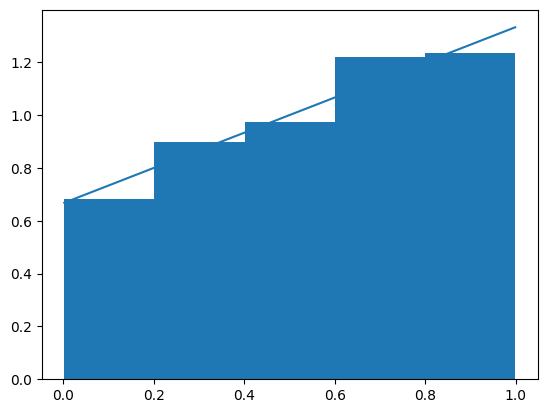

In [50]:
draw_hist_y(y_min, y_max, y_step, block_values)

# Плотность вероятности для второй величины
ys = np.linspace(y_min, y_max, DENSITY)
zs = [density_function_y.subs(y, y_value) for y_value in ys]
plt.plot(ys, zs)

None

### Дискретная случайная величина

In [51]:
DISCRETE_TWO_DIMENSIONAL_VARIABLE = [
    [0.01,  0.01,   0.02,   0.02,   0.01],
    [0.04,  0.3,    0.06,   0.03,   0.01],
    [0.02,  0.03,   0.06,   0.07,   0.05],
    [0.05,  0.03,   0.04,   0.02,   0.03],
    [0.03,  0.02,   0.01,   0.01,   0.02]
]


x_variable = [sum(row) for row in DISCRETE_TWO_DIMENSIONAL_VARIABLE]
y_variable = [sum(column) for column in zip(*DISCRETE_TWO_DIMENSIONAL_VARIABLE)]

print("Случайная величина X: ", *x_variable)
print("Случайная величина Y: ", *y_variable)

Случайная величина X:  0.07 0.44 0.23 0.17 0.09
Случайная величина Y:  0.15 0.39 0.19 0.15 0.12


In [52]:

# Случайная величина X при условии Y
conditional_x_variable = [[DISCRETE_TWO_DIMENSIONAL_VARIABLE[i][j] / y_variable[j] for i in range(len(DISCRETE_TWO_DIMENSIONAL_VARIABLE))] for j in range(len(DISCRETE_TWO_DIMENSIONAL_VARIABLE[0]))]
# Случайная величина Y при условии X
conditional_y_variable = [[DISCRETE_TWO_DIMENSIONAL_VARIABLE[i][j] / x_variable[i] for j in range(len(DISCRETE_TWO_DIMENSIONAL_VARIABLE[0]))] for i in range(len(DISCRETE_TWO_DIMENSIONAL_VARIABLE))]

print("Условная случайная величина X при условии Y:")
for row in conditional_x_variable:
    print(*row, sep='\t')
print()

print("Условная случайная величина Y при условии X:")
for row in conditional_y_variable:
    print(*row, sep="\t")
print()

Условная случайная величина X при условии Y:
0.06666666666666667	0.26666666666666666	0.13333333333333333	0.33333333333333337	0.2
0.02564102564102564	0.7692307692307692	0.07692307692307691	0.07692307692307691	0.05128205128205128
0.10526315789473684	0.3157894736842105	0.3157894736842105	0.21052631578947367	0.05263157894736842
0.13333333333333333	0.2	0.46666666666666673	0.13333333333333333	0.06666666666666667
0.08333333333333334	0.08333333333333334	0.4166666666666667	0.25	0.16666666666666669

Условная случайная величина Y при условии X:
0.14285714285714285	0.14285714285714285	0.2857142857142857	0.2857142857142857	0.14285714285714285
0.09090909090909091	0.6818181818181818	0.13636363636363635	0.06818181818181818	0.022727272727272728
0.08695652173913043	0.13043478260869565	0.2608695652173913	0.30434782608695654	0.21739130434782608
0.29411764705882354	0.1764705882352941	0.23529411764705882	0.11764705882352941	0.1764705882352941
0.3333333333333333	0.22222222222222224	0.11111111111111112	0.1111

In [53]:
variable_names = ["X", "Y"]
variables = [x_variable, y_variable]
conditional_variables = [conditional_x_variable, conditional_y_variable]

selected_variable_index = variable_names.index(hf.selector("Выберите первую случайную величину для генерации", variable_names))

Label(value='Выберите первую случайную величину для генерации')

Dropdown(options=('X', 'Y'), value='X')

Button(description='Ok', style=ButtonStyle())

In [54]:
# Функция генерация значений дискретной случайной величины
def generate_random_variable_values(variable_function, random_values_sorted):
    result = []

    i = 0
    current_p = variable_function(i)

    # Генерация значений случайной величины
    for value in random_values_sorted:
        while value > current_p:
            i += 1
            current_p = current_p + variable_function(i)
        result.append(i)
    
    return result

In [55]:
random_values_sorted = np.sort([rng.random() for _ in range(NUMBER_OF_RANDOM_VALUES)])
selected_variable = variables[selected_variable_index]
first_generation_function = lambda i_index: selected_variable[i_index]

random_variable_values_first = generate_random_variable_values(first_generation_function, random_values_sorted) # Значения выбранной случайной величины

In [56]:
conditional_not_selected_variable = conditional_variables[1 - selected_variable_index] # Условная случайная величина для генерации второй случайной величины

random_variable_values_second = []

# Генерация второй случайной величины
for i in range(NUMBER_OF_RANDOM_VALUES):
    second_generation_function = lambda j_index: conditional_not_selected_variable[random_variable_values_first[i]][j_index]
    random_variable_values_second.append(generate_random_variable_values(second_generation_function, [rng.random()])[0])

random_variable_values = list(zip(random_variable_values_first, random_variable_values_second))

In [57]:
mean_x = reduce(lambda prev, cur: prev + cur[1] * cur[0], enumerate(x_variable), 0) # Теоретическое математическое ожидание случайной величины X
mean_y = reduce(lambda prev, cur: prev + cur[1] * cur[0], enumerate(y_variable), 0) # Теоретическое математическое ожидание случайной величины Y
mean = [mean_x, mean_y]

variance_x = reduce(lambda prev, cur: prev + cur[1] * (cur[0] - mean_x) ** 2, enumerate(x_variable), 0) # Теоретическая дисперсия случайной величины X
variance_y = reduce(lambda prev, cur: prev + cur[1] * (cur[0] - mean_y) ** 2, enumerate(y_variable), 0) # Теоретическая дисперсия случайной величины Y
variance = [variance_x, variance_y]

# Теоретическая ковариация случайных величин X и Y
covariance = 0
for i, row in enumerate(DISCRETE_TWO_DIMENSIONAL_VARIABLE):
    for j, val in enumerate(row):
        covariance += val * (i - mean_x) * (j - mean_y)
        
correlational_coefficient = covariance / (variance_x * variance_y) ** 0.5 # Теоретический коэффициент корреляции случайных величин X и Y

print("Теоретическое математическое ожидание: ", mean)
print("Теоретическая дисперсия: ", variance)
print("Теоретическая ковариация: ", covariance)
print("Теоретический коэффициент корреляции случайных величин X и Y: ", correlational_coefficient)

Теоретическое математическое ожидание:  [1.77, 1.7]
Теоретическая дисперсия:  [1.1970999999999998, 1.5299999999999998]
Теоретическая ковариация:  0.13099999999999998
Теоретический коэффициент корреляции случайных величин X и Y:  0.09679665838411211


In [58]:
e_mean, e_variance, e_covariance, e_correlational_coefficient = emperic_parameters(random_variable_values)

print("Эмпирическое математическое ожидание: ", e_mean)
print("Эмпирическая дисперсия: ", e_variance)
print("Эмперическая ковариация: ", e_covariance)
print("Эмперический коэффициент корреляции случайных величин X и Y: ", e_correlational_coefficient)

Эмпирическое математическое ожидание:  [1.77, 1.681]
Эмпирическая дисперсия:  [1.183967099999989, 1.536499238999995]
Эмперическая ковариация:  0.08363000000000001
Эмперический коэффициент корреляции случайных величин X и Y:  0.06200491333744023


In [59]:
confidence = hf.float_input("Доверительная вероятность %", 0, 100, 1, False, False)[0] / 100

interval_from, interval_to = interval_correlational_coefficient(random_variable_values, confidence)

print(f"Доверительный интервал для коэффициента корреляции: [{interval_from}, {interval_to}]")

Label(value='Доверительная вероятность %')

FloatText(value=0.0)

Button(description='Ok', style=ButtonStyle())

Доверительный интервал для коэффициента корреляции: [0.025243854670723768, 0.09859850776088398]


In [60]:
number_of_blocks_x = len(variables[selected_variable_index])
number_of_blocks_y = len(variables[1 - selected_variable_index])

block_values, x_min, x_max, y_min, y_max, x_step, y_step = distribute_by_intervals(random_variable_values, number_of_blocks_x, number_of_blocks_y)

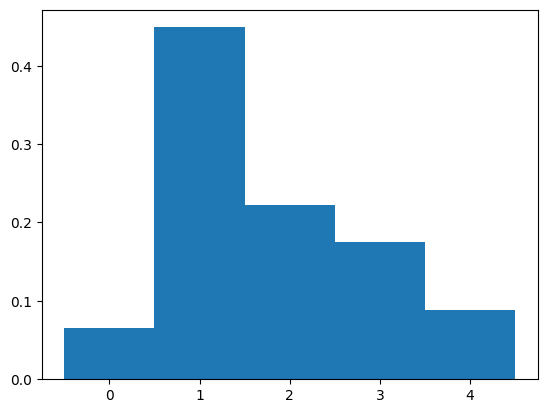

In [61]:
draw_hist_x(-0.5, 4.5, 1, block_values)

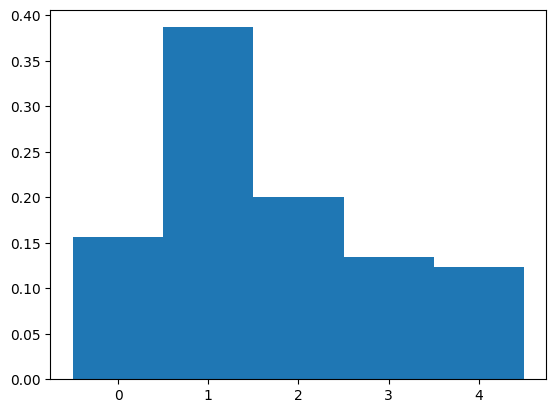

In [62]:
draw_hist_y(-0.5, 4.5, 1, block_values)